<a href="https://colab.research.google.com/github/DanielGao98/Computer-Vision/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4
Total number of questions: 3;
Total number of scores: 29 pts + 5 EC

Due date: Dec. 12th, noon (12:00 pm)

## Q1: Eight point algorithm (7 pts)
In this problem, you will estimate the fundamental matrix from a pair of images. You are asked to implement a (simplified) version of the Eight point algorithm, which computes the estimated fundamental matrix from a list of correspondences in the two images. We have provided you with the starter code as well as codes for loading the images, correspondences, and visualizing the epipola lines computed from the estimated fundamental matrix.

Notice that the coordinate system used in epipolar geometry is different from that in NumPy. In specific, the x and y axes are switched (shown below).![alt text](f1.png "Title")
The image pair (and the correspondences) you will be working on for this problem is loaded and illustrated in the next few blocks.

In [83]:
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt

def imread(path):
    return np.array(Image.open(path))

In [ ]:
# You might need to install the following packages.
# If you are using Google Colab, the following packages are already installed.
# !pip3 install -U numpy
# !pip3 install -U opencv-python

If you use Google Colab, in case you don't know, you can upload files to your google drive, mount the drive and access them just like in a local system. In specific, refer to this official Colab tutorial [link](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA&line=1&uniqifier=1). Following the step, you can access your `some_file.abc` in your Google Drive by the path `/content/drive/MyDrive/some_file.abc` or something similar. You can use `!ls /content/drive` to examine the specific paths in your Drive. Don't forget to accordingly modify paths to all the provided files.

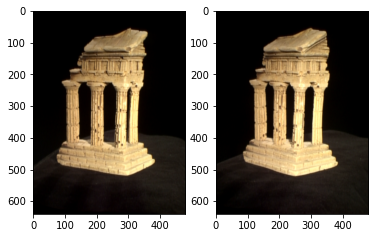

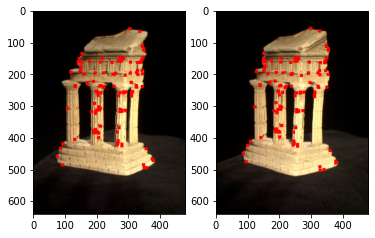

In [84]:
# Read the two images and convert them to double
im1 = imread('./im1.png')
im2 = imread('./im2.png')

# Load the correspondences for the eight point algorithm
pts1 = np.load('./pts1.npy')[:, ::-1]
pts2 = np.load('./pts2.npy')[:, ::-1]

#print(pts2)
plt.subplot(121)
plt.imshow(im1)
plt.subplot(122)
plt.imshow(im2)
plt.show()

for x, y in pts1:
    im1[y-5:y+5, x-5:x+5] = [255, 0, 0]
plt.subplot(121)
plt.imshow(im1)
for x, y in pts2:
    im2[y-5:y+5, x-5:x+5] = [255, 0, 0]
plt.subplot(122)
plt.imshow(im2)
plt.show()

### Please implement the simplified eight point algorithm below (5 pts)
In this simplified version, you don't need to worry about preprocessing (e.g., normalizing the image coordinates) and postprocessing (forcing the estimated fundamental matrix to be of rank 2). Hint: you can use SVD to find null space of a matrix.

In [85]:
#  Function:    Simplified eightpoint algorithm                                                  
#  Description: Estimate the fundamental matrix F using N given            
#               correspondences (N>=8)                                                                                                         
#               Input:  X and Y - each N x 2 matrices with coordinates     
#                                 that constitute correspondences with     
#                                 the first and second image respectively  
#               Output: F - the 3 x 3 fundamental matrix                   

def eightpoint(X, Y):
    assert X.shape[0] == Y.shape[0], 'X and Y should have same number of rows.'
    assert X.shape[1] == Y.shape[1] == 2
    assert X.shape[0] >= 8, 'At least 8 point pairs are required to compute F.'

    N = X.shape[0]
    W = np.zeros(shape=(N,9))
    
    for i in range(N):
      for j in range(9):
        if j == 0:
          W[i][j] = X[i][0] * Y[i][0]
        elif j == 1:
          W[i][j] = X[i][0] * Y[i][1]
        elif j == 2:
          W[i][j] = X[i][0]
        elif j == 3:
          W[i][j] = X[i][1] * Y[i][0]
        elif j == 4:
          W[i][j] = X[i][1] * Y[i][1]
        elif j == 5:
          W[i][j] = X[i][1]
        elif j == 6:
          W[i][j] = Y[i][0]
        elif j == 7:
          W[i][j] = Y[i][1] 
        elif j == 8:
          W[i][j] = 1

    # SVD on W matrix
    U, S, V = np.linalg.svd(W)
    
    # Select eigenvector in V with the lowest eigenvalue V[-1]
    f = V[-1]
    
    # reshape to 3x3
    f = f.reshape(3,3)
    
    print("f is: ")
    print(f)
    
    return f

In [86]:
# Utility function to draw epipolar lines.
def drawlines(img1, img2, lines, pts1, pts2):
    """ img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines
    """
    r, c, _ = img1.shape
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

### The following block visualizes the epipolar lines computed based on the eight point algorithm you just implemented. Please run it to show your results (2 pts).

f is: 
[[-1.20250102e-05 -1.00398405e-05 -2.88396792e-04]
 [-6.13475782e-08  1.22680008e-06 -4.81611707e-02]
 [ 7.72543337e-03  5.02530966e-02 -9.97544667e-01]]


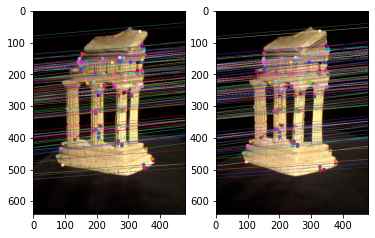

In [87]:
# Compute the fundamental matrix using the eight point algorithm
F = eightpoint(pts1, pts2)

# Visualize the correctness of the estimated F by finding and drawing epilines
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2, F)
lines1 = lines1.reshape(-1, 3)
im3, _ = drawlines(im1, im2, lines1, pts1, pts2)
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 2, F)
lines2 = lines2.reshape(-1, 3)
im4, _ = drawlines(im2, im1, lines2, pts2, pts1)

plt.subplot(121)
plt.imshow(im3)
plt.subplot(122)
plt.imshow(im4)
plt.show()

# Q2: Correspondence Estimation (10 pts)
In this problem, you will calculate correspondences using the fundamental matrix estimated from the previous problem. The functions you need to implement is the `compute_correspondence()` and its associated helper functions `get_window()` and `compute_difference()`. `compute_correspondence()` takes in the x and y coordinates of a pixel on `im1` as well as your fundamental matrix F, and returns the coordinates of the pixel on `im2` which correspond to the input point. With the matrix F, instead of searching for our matching point at every possible location in `im2`, we can simply search over the set of pixels that lie along the corresponding epipolar line (recall that the epipolar line passes through a single point in `im2` which corresponds to the point (x1, y1) in `im1`). Slide a window along the epipolar line in `im2`and find the one that matches most closely to the window around the point in `im1`. There are various ways to compute the window similarity, the simplist of which can be the Euclidean distances.

Implementation hints: 
1. You can ignore the windows near the image boundary during searching for simplicity.
2. Try to experiment with different window sizes.
3. Please review to the slides for epipolar geometry.
4. A short [review](http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/OWENS/LECT11/node12.html) of how to compute epipolar lines.

### Please implement the following functions (8 pts).

In [94]:
# imported for max int comparators
import sys

# Function:    compute_correspondence                                     
# Description: Slide a window along the epipolar line in im2 and find     
#              the one that matches most closely to the window around     
#              the point in im1                                             
#                                                                        
#              Input:  x1 and y1 - The x and y coordinates of a pixel     
#                                  on im1                                 
#                      im1 and im2 - two images
#                      window_size - size for computing the window similarity
#                      F - The 3*3 fundamental matrix                     
#                                                                    
#              Output: x2 and y2 - The x and y coordinates of the     
#                                  corresponding pixel on im1             
def compute_correspondence(im1, im2, F, x1, y1, window_size):
    ### YOUR CODE HERE ###
    # The comments below provide a reference. Feel free to change or add code if necessary.    
    # Get the patch in image1
    patch1 = get_window(x1, y1, window_size, im1)

    # Compute the epipolar line
    p = np.array([x1,y1,1])
    p = p.T
    epipolar_line = np.dot(F.T, p)

    # Use for loop to get the points along the line and find the points that are closest to the one in image 1
    x2 = 0
    y2 = 0
    closest = sys.maxsize
    for currX in range(int(window_size/2), int(480 - int(window_size/2))):
      currY = int((-epipolar_line[2] - (epipolar_line[0] * currX))/epipolar_line[1])
      if currY > int(window_size/2) and currY < int(640 - int(window_size/2)):
        patch2 = get_window(currX, currY, window_size, im2)
        d = compute_difference(patch1, patch2, window_size)
        if d < closest:
          closest = d
          x2 = currX
          y2 = currY
    return x2, y2

#  Function:    get_window                                                  
#  Description: Get the intensity values of the window in the given image    
#                                                                         
#               Input:  x and y - The coordinates of the window center     
#                       sizeW - The width of the window                    
#                       image - input image
#                                                                         
#               Output: patch                                              
def get_window(x, y, sizeW, image):
    ### YOUR CODE HERE ###
    
    startX = int(x - sizeW/2)
    startY = int(y - sizeW/2)
    
    a = 0
    b = 0
    endX = startX + sizeW
    endY = startY + sizeW
    ret = np.zeros(shape=(sizeW, sizeW, 3))

    for j in range(startY, endY):
      a = 0
      for i in range(startX, endX):
        ret[b][a][0] = image[j][i][0]
        ret[b][a][1] = image[j][i][1]
        ret[b][a][2] = image[j][i][2]
        a += 1
      b += 1
    return ret
    ### END OF YOUR CODE ###

#  Function:    compute_difference                                           
#  Description: compute difference between the two windows                   
#                                                                         
#               Input:  patch1 - patch from image1                         
#                       patch2 - patch from image2                         
#                       sizeW - The width of the window                    
#                                                                         
#               Output: d - distance                                       
def compute_difference(patch1, patch2, sizeW):
    ### YOUR CODE HERE ###
    v_1 = np.ndarray.flatten(patch1)
    v_2 = np.ndarray.flatten(patch2)
    ret = np.linalg.norm(v_1 - v_2)
    return ret
    ### END OF YOUR CODE ###

### Please show your results using the visualization codes below. Modify the code if necessary. (2 pts)

In [97]:
pts = np.load('./test_pts.npy')[:, ::-1]
np.random.seed(0)
perm = np.random.permutation(len(pts))[:50]
pts = pts[perm]
im1 = imread('./im1.png')

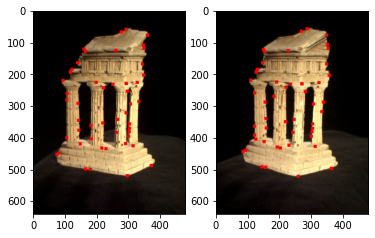

In [98]:
for x, y in pts:
    im1[y-5:y+5, x-5:x+5] = [255, 0, 0]
plt.subplot(121)
plt.imshow(im1)

# Reload the original image1 and 2.
im1 = imread('./im1.png')
im2 = imread('./im2.png')

window_size = 20 # Examine different window_size and choose the one you find the best.
results = []
pts_test = pts[:1]

for x, y in pts:
    x, y = compute_correspondence(im1, im2, F, x, y, window_size)
    results.append((x, y))
for x, y in results:
    im2[y-5:y+5, x-5:x+5] = [255, 0, 0]
plt.subplot(122)
plt.imshow(im2)
plt.show()

# Q3: Optical Flow (12 pts)
In this problem, you will implement the Lucas–Kanade method for estimating the optical flow. You can visulize the output by using the provided code. We also have an additional open-ended question for 5 extra points (described at the end). Remark: `scipy.signal.convolve2d()` might be handy.

In [99]:
!pip3 install flow_vis  # Used for visualing optical flow.
from scipy import signal

### Please implement the following function (10 pts).

In [110]:
# input 3d vector of rgb value, output grayscale value, from stack overflow 
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

# Function:    optical_flow                                     
# Description: use the Lucas–Kanade method to estimate the optical flow
#                                                                        
#              Input:  im1 and im2 - two images    
#                      window_size - size for the window used in LK method
#                                                                    
#              Output: U, V - flow in the x and y directions (each should have shape H x W)

def optical_flow(im1, im2, window_size):
    U = np.zeros(shape=(480, 720))
    V = np.zeros(shape=(480,720))
    ### YOUR CODE HERE ###        
    
    x_kernel = np.array([[-1,1], [-1,1]])
    y_kernel = np.array([[-1,-1], [1,1]])
    t_kernel_1 = np.array([[-1,-1], [-1,-1]])
    t_kernel_2 = np.array([[1,1], [1,1]])

    #get grayscales
    gray_im1 = rgb2gray(im1)
    gray_im2 = rgb2gray(im2)

    # get Ix with conv on im1
    Ix = signal.convolve2d(gray_im1, x_kernel, mode='same', boundary="fill")
    print("Ix is " + str(Ix.shape))
    print(Ix)

    # get Iy with conv on im1
    Iy = signal.convolve2d(gray_im1, y_kernel, mode='same', boundary="fill")
    print("Iy is " + str(Iy.shape))
    print(Iy)

    # get It with conv im1 and im2 and add them
    It_1 = signal.convolve2d(gray_im1, t_kernel_1, mode='same', boundary="fill")
    print(It_1)
    It_2 = signal.convolve2d(gray_im2, t_kernel_2, mode='same', boundary="fill")
    print(It_2)
    It = It_2 + It_1
    print("It is " + str(It.shape))
    print(It)
    
    # index whole image with boundary buffers
    for j in range(int(window_size/2), im1.shape[0] - int(window_size/2)):
      for i in range(int(window_size/2), im1.shape[1] - int(window_size/2)):
        A = np.zeros(shape=(window_size*window_size, 2))
        b = np.zeros(shape=(window_size*window_size, 1))
        c = 0
        d = np.zeros(shape=(2)) 
        # get window values for A and b
        for k in range(int(j - int(window_size/2)), int(j + int(window_size/2))+1):
          for l in range(int(i - int(window_size/2)), int(i + int(window_size/2))+1):
            A[c][0] = Ix[k][l]
            A[c][1] = Iy[k][l]
            b[c] = It[k][l]
            c += 1
     
        try:
          ATA = np.dot(A.T, A)
          #print("ATA is " + str(ATA))
          ATb = np.dot(A.T, b)
          """
          eigenvals, _ = np.linalg.eig(ATA) 
          if (eigenvals[0] > 500 or eigenvals[1] > 500) and (eigenvals[0] != 0 and eigenvals[1]/eigenvals[0] < 100000):
            print("eigenvalues are " + str(eigenvals))
          """
          d = np.dot(np.linalg.inv(ATA), ATb)
          U[j][i] = d[0]
          V[j][i] = d[1]  

        except np.linalg.LinAlgError as err:
          pass     
      
    print("U:")
    print(U)
    print("V:")
    print(V)
      ### END OF YOUR CODE ###
    return U, V

The next block loads the data, which consists of 101 image sequences constructed from a short video. We ask you to estimate optical flow on the first two images (illustrated below).

(480, 720, 3, 101)


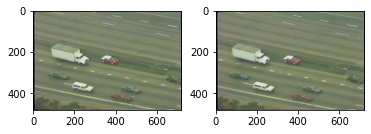

In [111]:
cars = np.load('./cars.npy') # Shape: H x W x 3 x NUM_IMAGES
im1 = cars[..., 0]
im2 = cars[..., 1]
print(cars.shape)
plt.subplot(221)
plt.imshow(im1)
plt.subplot(222)
plt.imshow(im2)
plt.show()

### Please examine the algorithm with different window size, choose the best one you find, and use the following block to visualize your computed optical flow, which converts flow map to a color map (2 pts).

Ix is (480, 720)
[[ -6.1797   1.7718  -2.6577 ...  -1.9998   0.      10.9989]
 [-12.3594   3.5436  -3.5436 ...   0.       5.9994  25.9974]
 [-11.4735   3.5436   0.2881 ...  10.9989  23.9976  35.9964]
 ...
 [ -3.9996   2.9997  -0.9999 ...  11.9988  11.5428   9.999 ]
 [ -3.2277   2.9997  -1.9998 ...  -2.9997  -1.4559   1.9998]
 [ -1.4559   0.9999  -1.9998 ...  -4.9995  -0.456    1.9998]]
Iy is (480, 720)
[[-6.17970000e+00 -1.05876000e+01 -1.14735000e+01 ... -2.49947600e+02
  -2.51947400e+02 -2.40948500e+02]
 [ 0.00000000e+00  8.88178420e-16  1.77180000e+00 ... -9.99900000e+00
   0.00000000e+00  9.99900000e+00]
 [ 8.85900000e-01  1.77180000e+00  3.83170000e+00 ...  1.45425000e+01
   3.35406000e+01  5.15388000e+01]
 ...
 [ 0.00000000e+00  9.99900000e-01  9.99900000e-01 ... -5.99940000e+01
  -8.79912000e+01 -1.09989000e+02]
 [ 7.71900000e-01  5.43900000e-01 -4.56000000e-01 ...  2.99970000e+00
   2.99970000e+00  3.99960000e+00]
 [ 9.99900000e-01  9.99900000e-01  2.77555756e-17 ... -1.2998700

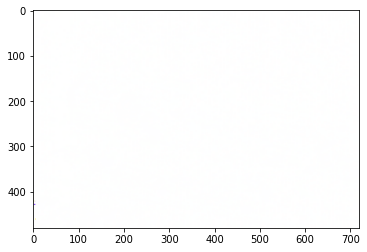

In [112]:
import flow_vis

U, V = optical_flow(im1,im2,5) # Compute U, V.
flow_color = flow_vis.flow_to_color(np.stack([U, V], 2), convert_to_bgr=False)

plt.imshow(flow_color)


******************************* PLEASE READ *************************

For the plot above when I ran the optical flow algorithm I ran into some outliers caused by flat areas and edges and I saw this in zero gradient values Ix and Iy images, as well as large ratio's between the eigenvalues of the ATA matrix. I tried to fix this through manipulating using the eigenvalues of ATA directly, however nothing was showing up on the plot. So I added the section below where I clip the upper and lower outliers from the U,V matrices based on the calculated standard deviation and mean.

orig mean of U is -0.9837931823041035
orig mean of V is -291612583424.61523
orig std of U is 10.54574956629485
orig std of V is 238573846797433.1
----------------------
new mean of U is -0.8591097954921335
new mean of V is 0.5072519664412867
new std of U is 3.446351983850033
new std of V is 2.212033903399927


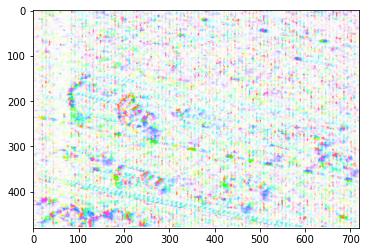

In [113]:
print("orig mean of U is " + str(np.mean(U)))
print("orig mean of V is " + str(np.mean(V)))
print("orig std of U is " + str(np.std(U)))
print("orig std of V is " + str(np.std(V)))
#print(V[134])


for y in range(U.shape[0]):
  for x in range(U.shape[1]):
    if U[y][x] < -11:
       U[y][x] = -11   
    elif U[y][x] > 11:
      U[y][x] = 11

for y in range(V.shape[0]):
  for x in range(V.shape[1]):
    if V[y][x] < -7:
       V[y][x] = -7   
    elif V[y][x] > 13:
      V[y][x] = 13

print("----------------------")
print("new mean of U is " + str(np.mean(U)))
print("new mean of V is " + str(np.mean(V)))
print("new std of U is " + str(np.std(U)))
print("new std of V is " + str(np.std(V)))

flow_color2 = flow_vis.flow_to_color(np.stack([U, V], 2), convert_to_bgr=False)

plt.imshow(flow_color2)

#plt.show()

## Extra Credits (5 pts)
Although a classical computer vision problem, nowadays, several deep learning approaches have tackled the optical flow estimation problem pretty well (e.g., [FlowNet](https://towardsdatascience.com/a-brief-review-of-flownet-dca6bd574de0), [PWC-Net](https://arxiv.org/abs/1709.02371)), and optical flow has been used in new ways (e.g., [unsupervised object discovery](https://openaccess.thecvf.com/content_CVPR_2019/papers/Xie_Object_Discovery_in_Videos_as_Foreground_Motion_Clustering_CVPR_2019_paper.pdf)). In this open-ended extra credit question, we ask you to identify moving objects from the previously dataset (the image `im1`). In specific, you can use the computed optical flow, together with other machine learning techniques, to group pixels into disjoint areas. You can show the visual result on `im1` as a map that gives each area a different color (e.g., background with negligible optical flow can be black).

Some additional resources that might be helpful:
1. Moving object trajectory clustering [link](https://arxiv.org/abs/1802.06971)
2. Optical flow based moving object detection [link](https://arxiv.org/pdf/1807.04890.pdf)
3. Motion detection by optical flow [link](https://medium.com/@vaibhaw.vipul/tracking-motion-without-neural-networks-6370445e0b27)